Movies
This time, we are dealing with a dataset related to movies. You probably
already downloaded the data movies.csv from Madoc, and loaded it. Before
diving into learning models, be sure to proceed to a first statistical (and
understanding) analysis. First, we will not take into the analysis the title of
the movie. This is NLP and out of the scope for the moment. The other
attributes are self explanatory, except wr, which stands for Weighted Rating.

$$wr = (\frac{v}{v+m}) \cdot R + (\frac{m}{v+m}) \cdot C$$

• mis the minimum votes required to be listed in the chart
• R is the average rating of the movie
• C is the mean vote across the whole repor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('movies.csv')
df = pd.DataFrame(df)
df.head()

,title,year,budget,revenue,runtime,vote_count,vote_average,popularity,wr,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Inception,2010,160000000,8.255328e+08,148.0,14075,8,29.108149,7.917588,True,...,False,False,False,True,False,True,False,True,False,False
1,The Dark Knight,2008,185000000,1.004558e+09,152.0,12269,8,123.167259,7.905871,True,...,False,False,False,False,False,False,False,True,False,False
2,Interstellar,2014,165000000,6.751200e+08,169.0,11187,8,32.213481,7.897107,False,...,False,False,False,False,False,True,False,False,False,False
3,Fight Club,1999,63000000,1.008538e+08,139.0,9678,8,63.869599,7.881753,False,...,False,False,False,False,False,False,False,False,False,False
4,The Lord of the Rings: The Fellowship of the Ring,2001,93000000,8.713684e+08,178.0,8892,8,32.070725,7.871787,True,...,False,False,False,False,False,False,False,False,False,False


In [5]:
C = df['vote_average'].mean()
print(C)
m = df['vote_count'].quantile(0.95)
print(m)
v = df['vote_count']
R = df['vote_average']
df['score'] = (v/(v+m))*R + (m/(v+m))*C
print(df['score'].head())





6.1596306068601585
4817.999999999998
0    7.530678
1    7.481073
2    7.445992
3    7.388321
4    7.353253
Name: score, dtype: float64


Now it’s time to learn a model. We want to predict the popularity of movie.
Attribute ’Popularity’ is numeric.

Mean Squared Error: 0.0002163788079517593
R^2 Score: 0.9945138261009612


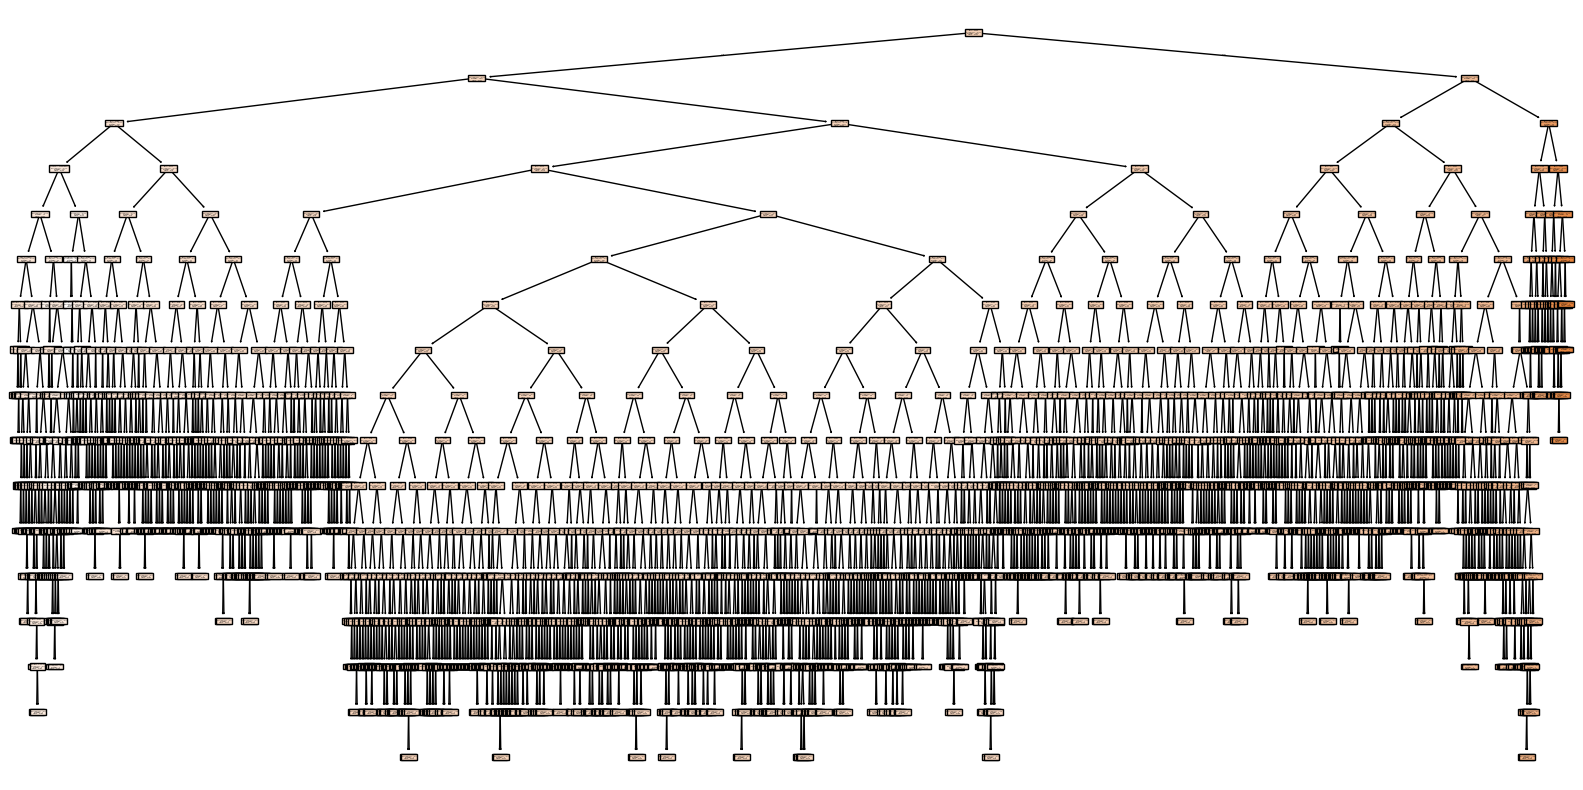

In [7]:
# keep only numeric features (drop text/object columns like 'title')
X = df.select_dtypes(include=[np.number]).drop(['score', 'vote_average', 'vote_count'], axis=1)
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()